In [1]:
!pip install data-purifier

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 10.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.8/121.8 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.7/241.7 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 38.6 MB/s eta 0:00:00
  Created wheel for data-purifier: filename=data_purifier-0.3.6-py3-none-any.whl size=54149 sha256=e5945891fc0d661deff2cf48958e47e303147627ffa415ae04721ea2d428d37f
  Stored in directory: /root/.cache/pip/wheels/6d/80/86/cb6e32868f686c85c3c4894466a269cba649e281d0b31a7451
Successfully built data-purifier
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.6
    Uninstalling widgetsnbextension-3.6.6:
      Successfully uninstalled

In [2]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 23.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [3]:
# importing packages

import datapurifier as dp
from datapurifier import Mleda
from datapurifier import Nlpeda
from datapurifier import Nlpurifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns


# Step 1:**Importing Dataset**

In [4]:
from google.colab import drive

drive.mount('/content/drive')

path_link = "/content/drive/My Drive/drugsComTrain_raw.tsv"
df_train = pd.read_csv(path_link,sep='\t')
path_link = "/content/drive/My Drive/drugsComTest_raw.tsv"
df_test = pd.read_csv(path_link,sep='\t')

Mounted at /content/drive


In [ ]:
df_train.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


In [ ]:
df = pd.concat([df_train,df_test])

In [ ]:
df.shape

(215063, 7)

# Step 2:**Exploratory Data Analysis:**

Text(0.5, 1.0, 'Top20 : The number of drugs per condition.')

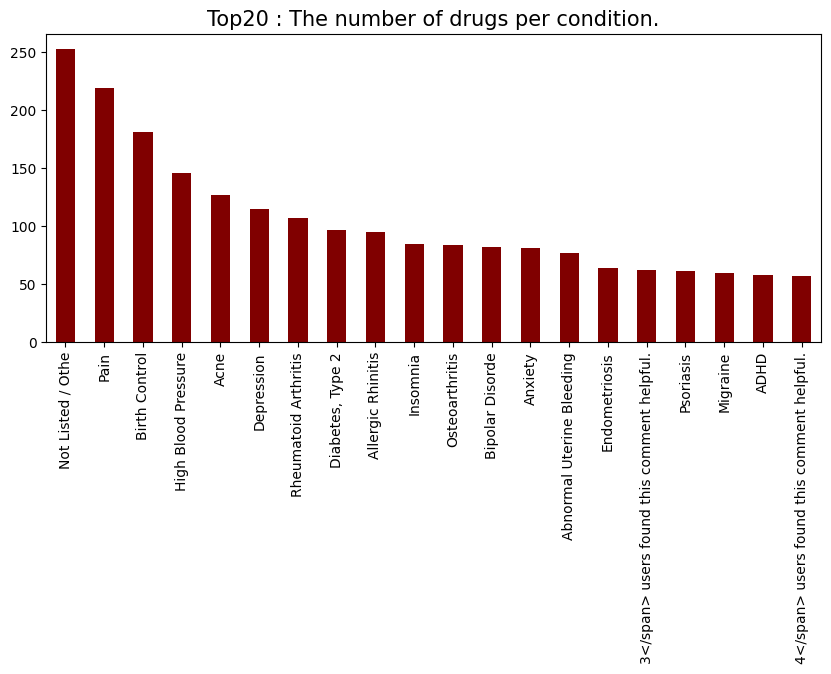

In [ ]:
condition_dn = df.groupby(['condition'])['drugName'].nunique().sort_values(ascending=False)
condition_dn[0:20].plot(kind="bar", figsize = (10,4), fontsize = 10,color="maroon")
plt.xlabel("", fontsize = 15)
plt.ylabel("", fontsize = 15)
plt.title("Top20 : The number of drugs per condition.", fontsize = 15)

Text(0.5, 1.0, 'Bottom20 : The number of drugs per condition.')

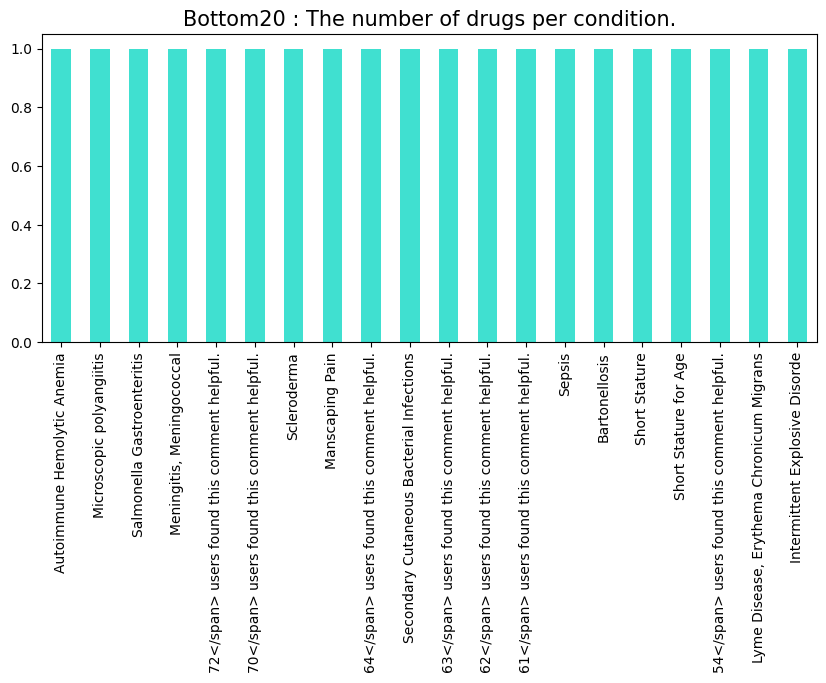

In [ ]:
condition_dn = df.groupby(['condition'])['drugName'].nunique().sort_values(ascending=False)

condition_dn[condition_dn.shape[0]-20:condition_dn.shape[0]].plot(kind="bar", figsize = (10,4), fontsize = 10,color="turquoise")
plt.xlabel("", fontsize = 15)
plt.ylabel("", fontsize = 15)
plt.title("Bottom20 : The number of drugs per condition.", fontsize = 15)

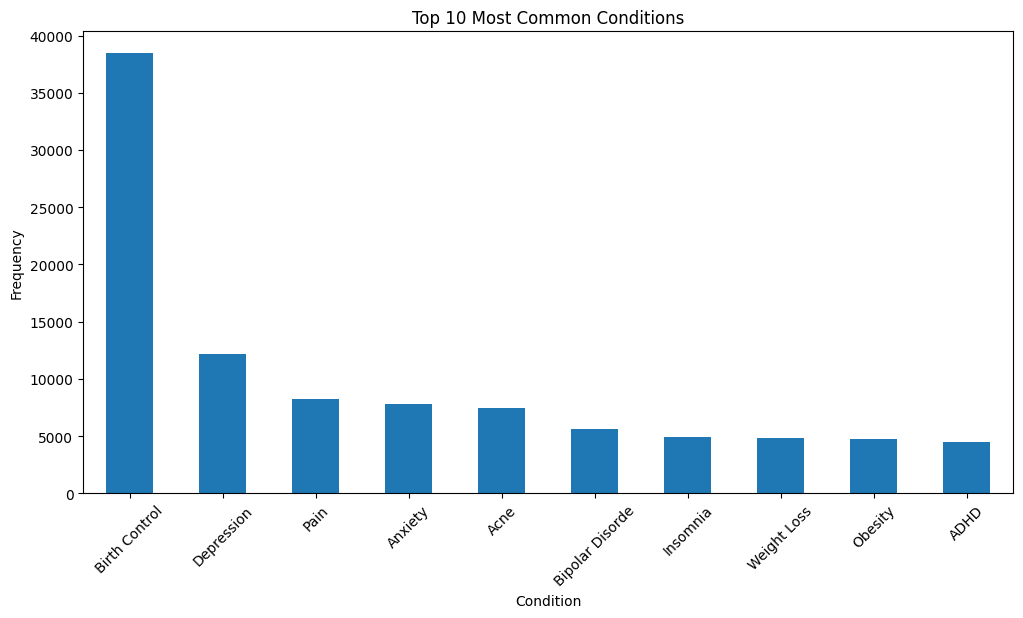

In [ ]:
plt.figure(figsize=(12, 6))
top_conditions = df['condition'].value_counts().head(10)
top_conditions.plot(kind='bar')
plt.title('Top 10 Most Common Conditions')
plt.xlabel('Condition')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

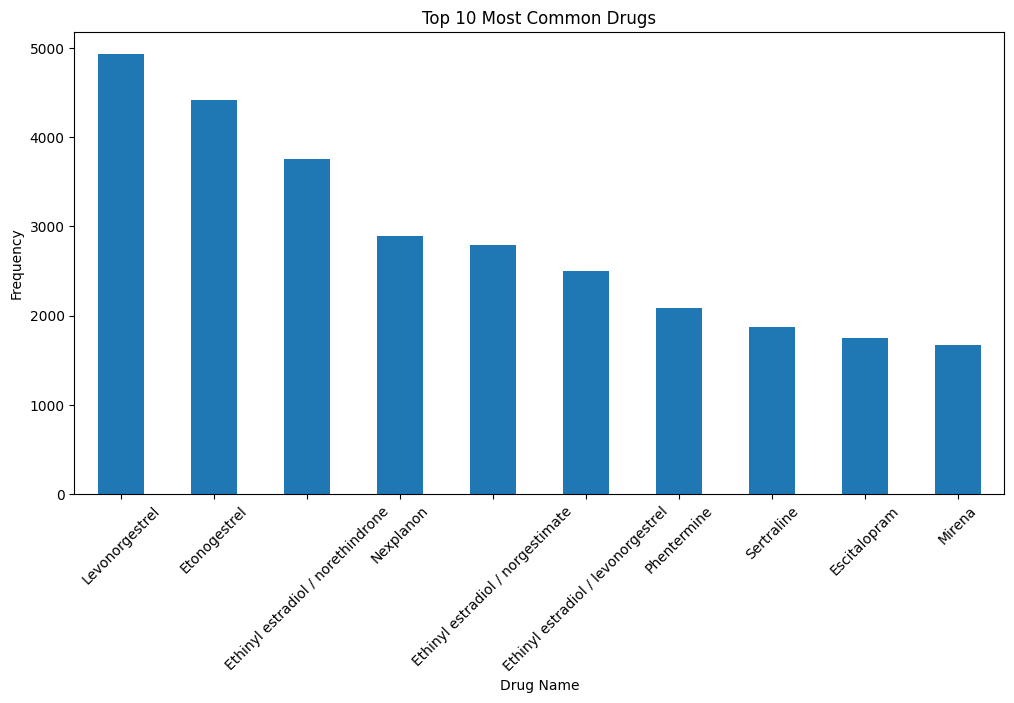

In [ ]:
plt.figure(figsize=(12, 6))
top_drugs = df['drugName'].value_counts().head(10)
top_drugs.plot(kind='bar')
plt.title('Top 10 Most Common Drugs')
plt.xlabel('Drug Name')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [ ]:
import nltk
pure = Nlpurifier(df, "review")

GridspecLayout(children=(Checkbox(value=False, description='Drop Null Rows', indent=False, layout=Layout(grid_…


Convert Word to its Base Form


interactive(children=(RadioButtons(description='Technique:', options=('None', 'Stemming', 'Lemmatization'), va…

Remove Top Common Words


interactive(children=(Checkbox(value=False, description='Remove Top Common Words'), Output()), _dom_classes=('…

Remove Top Rare Words


interactive(children=(Checkbox(value=False, description='Remove Top Rare Words'), Output()), _dom_classes=('wi…

Button(description='Start Purifying', style=ButtonStyle())

Dataframe contains 215063 rows and 7 columns

Starting execution of 'remove_numbers' function, Please wait...
Finished execution of 'remove_numbers' function in 1.660 secs

Starting execution of 'remove_html_tags' function, Please wait...
Finished execution of 'remove_html_tags' function in 12.035 secs

Starting execution of 'remove_urls' function, Please wait...
Finished execution of 'remove_urls' function in 1.170 secs

Starting execution of 'remove_multiple_spaces' function, Please wait...
Finished execution of 'remove_multiple_spaces' function in 1.644 secs

Starting execution of 'remove_accented_chars' function, Please wait...
Finished execution of 'remove_accented_chars' function in 0.542 secs

Starting execution of 'remove_stop_words' function, Please wait...
Finished execution of 'remove_stop_words' function in 3.275 secs

Starting execution of 'remove_punctuations' function, Please wait...
Finished execution of 'remove_punctuations' function in 3.010 secs


Purifying Completed

# Lemmatization

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')

nltk.download('wordnet')
pure_df=pure.df

# Initializing the lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to perform lemmatization on a sentence
def lemmatize_sentence(sentence):
    tokens = word_tokenize(sentence)  # Tokenize the sentence into words
    lemmatized_sentence = ' '.join([lemmatizer.lemmatize(word) for word in tokens])  # Lemmatize each word
    return lemmatized_sentence

# Applying lemmatization to the 'review' column
pure_df['review'] = pure_df['review'].apply(lambda x: lemmatize_sentence(x))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
google_drive_path = '/content/drive/My Drive/pure_df.csv'
pure_df.to_csv(google_drive_path, index=False)
print(f"DataFrame saved successfully to: {google_drive_path}")

DataFrame saved successfully to: /content/drive/My Drive/pure_df.csv


## IMPORTING PREPROCESSED FILE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
google_drive_path = '/content/drive/My Drive/pure_df.csv'
import pandas as pd
df = pd.read_csv(google_drive_path)
print("DataFrame loaded from CSV file:")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
DataFrame loaded from CSV file:


In [ ]:
df.shape

(215063, 7)

In [ ]:
df.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,It effect I combination Bystolic Mg Fish Oil,9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,My son halfway fourth week Intuniv We concerne...,8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,I oral contraceptive pill cycle happy- light p...,5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,This time form birth control Im glad I went pa...,8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,Suboxone completely turned life around I feel ...,9.0,"November 27, 2016",37


In [ ]:
df.rename(columns = {'Unnamed: 0':'user_id'}, inplace = True)


## This means that every user has given one review only.

In [ ]:
print(df['user_id'].nunique())
print(df.shape)

215063
(215063, 7)


In [ ]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['user_id', 'rating', 'usefulCount']

We have 4 categorical features : ['drugName', 'condition', 'review', 'date']


# Number of unique conditions in our dataset

In [ ]:
df['condition'].nunique()

916

In [ ]:

unique_values = df['condition'].unique()

# Printing unique values
for value in unique_values:
    print(value)

Left Ventricular Dysfunction
ADHD
Birth Control
Opiate Dependence
Benign Prostatic Hyperplasia
Emergency Contraception
Bipolar Disorde
Epilepsy
Migraine Prevention
Depression
Crohn's Disease
Cough
Obesity
Urinary Tract Infection
ibromyalgia
Chronic Myelogenous Leukemia
HIV Infection
Insomnia
Rheumatoid Arthritis
Vaginal Yeast Infection
Chlamydia Infection
Hirsutism
Panic Disorde
Migraine
nan
Pain
Irritable Bowel Syndrome
Osteoarthritis
Constipation
Bowel Preparation
Psychosis
Muscle Spasm
Hepatitis C
Overactive Bladde
Diabetes, Type 2
Asthma, Maintenance
Non-Small Cell Lung Cance
Schizophrenia
Dysuria
Smoking Cessation
Anxiety
Acne
emale Infertility
Constipation, Acute
Constipation, Drug Induced
Erectile Dysfunction
Trigeminal Neuralgia
Underactive Thyroid
Chronic Pain
Atrophic Vaginitis
Skin and Structure Infection
Tinnitus
Major Depressive Disorde
Anxiety and Stress
Rosacea
High Blood Pressure
2</span> users found this comment helpful.
Restless Legs Syndrome
Osteolytic Bone Metastase

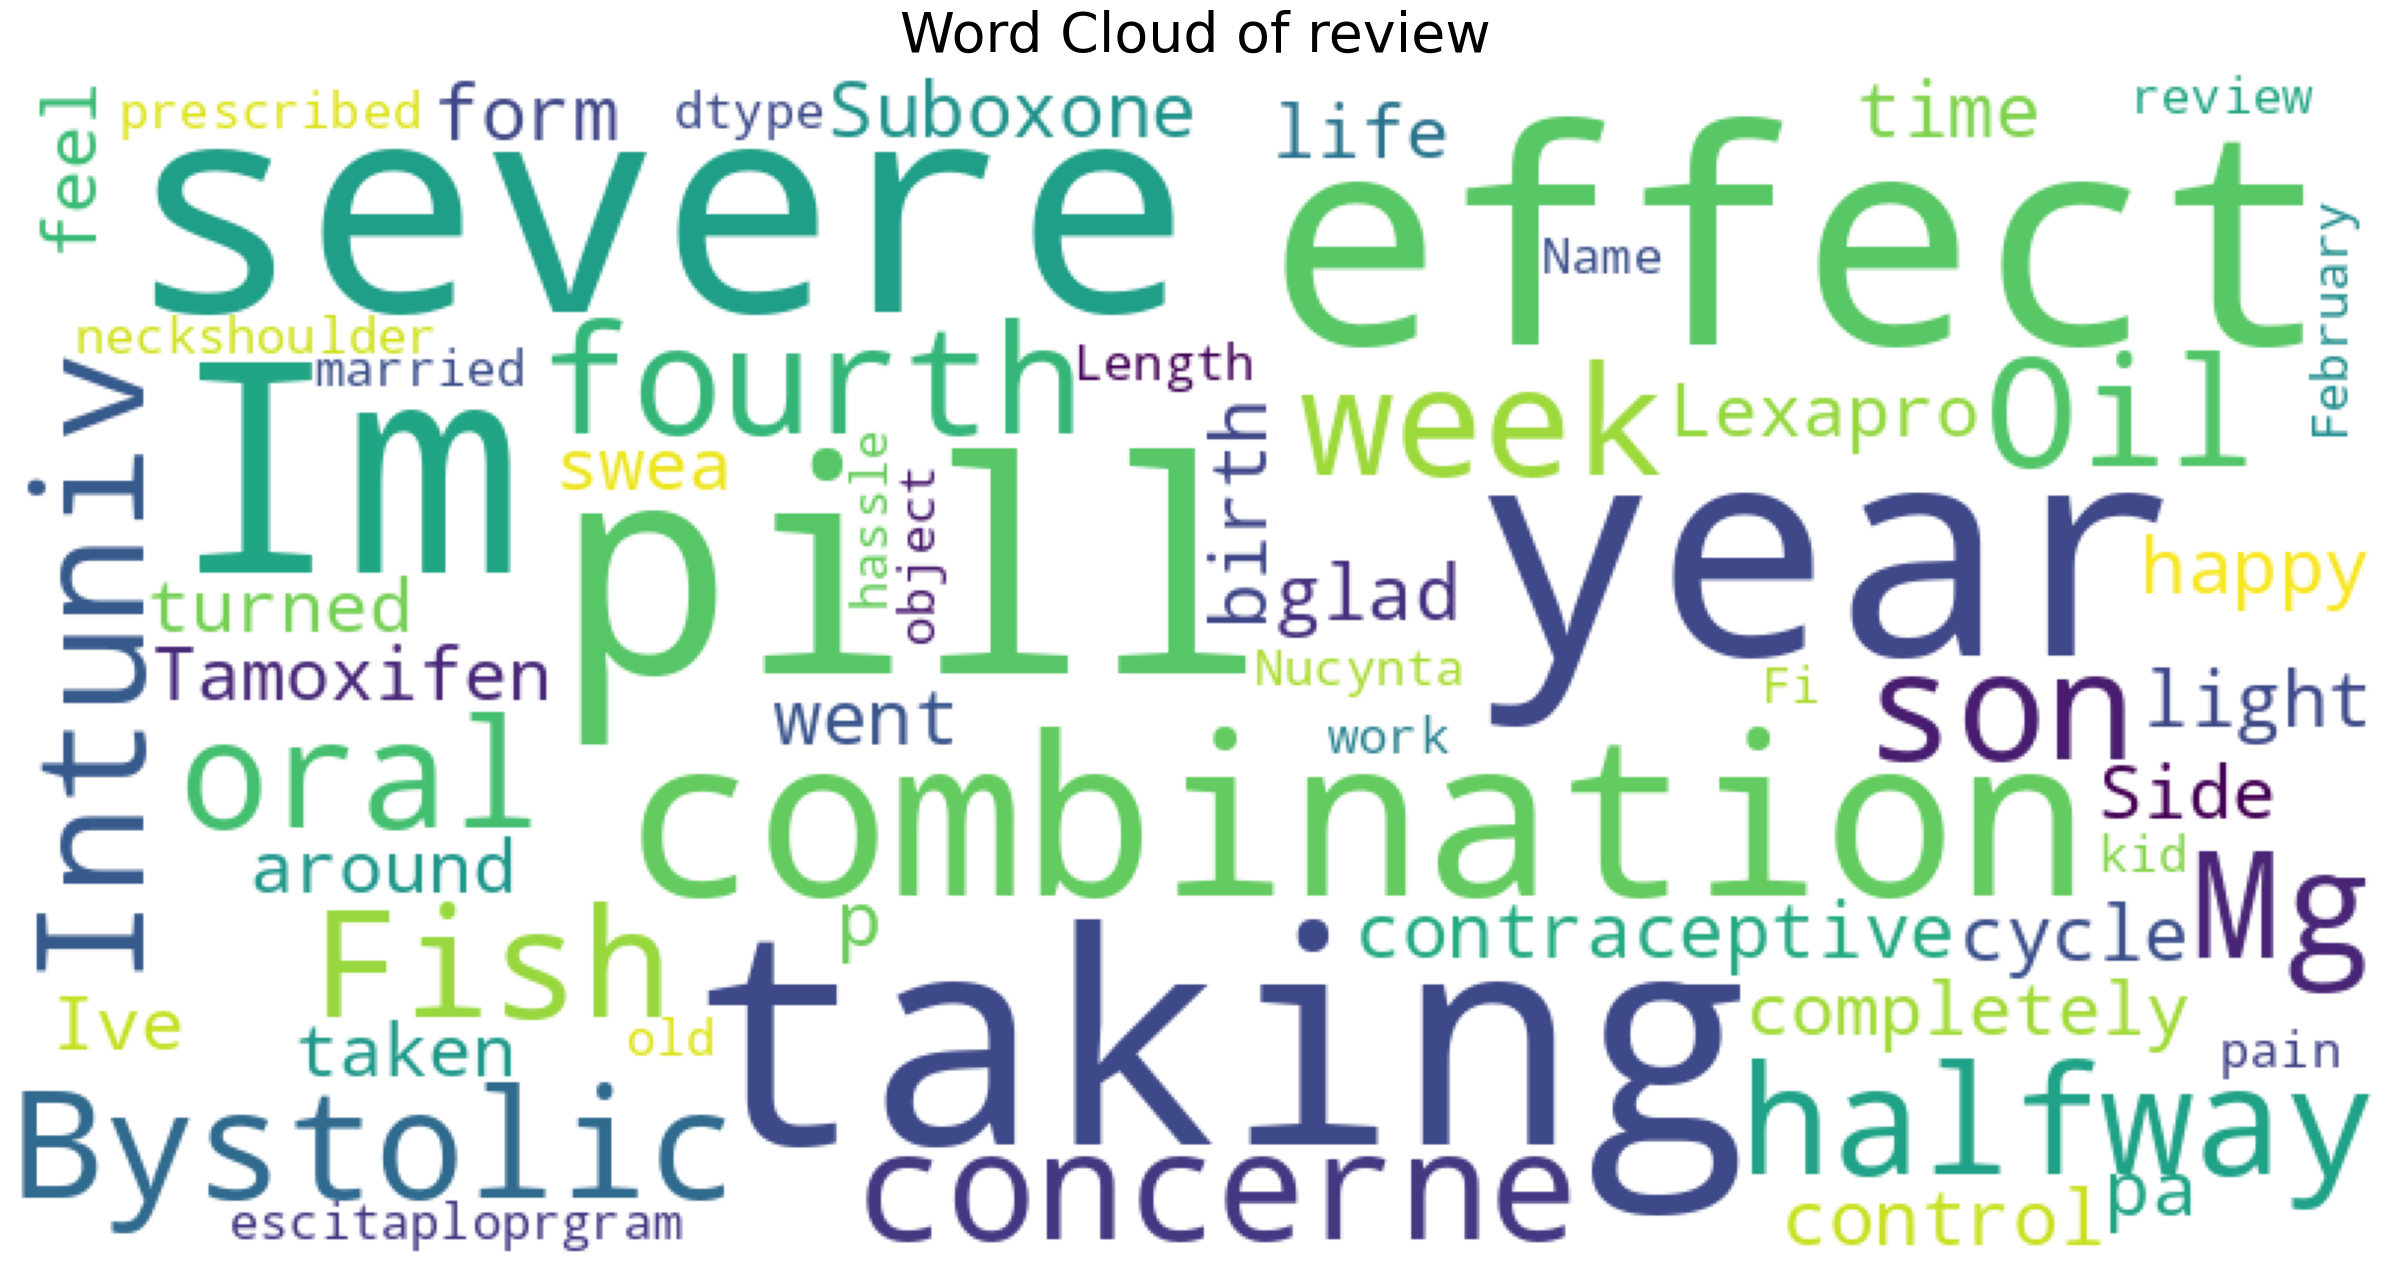

In [ ]:
from wordcloud import WordCloud, STOPWORDS

def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(24.0,16.0),
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size,
                    random_state = 42,
                    width=800,
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))

    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black',
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()

plot_wordcloud(df["review"], title="Word Cloud of review")

Text(0.5, 1.0, 'Count of rating values')

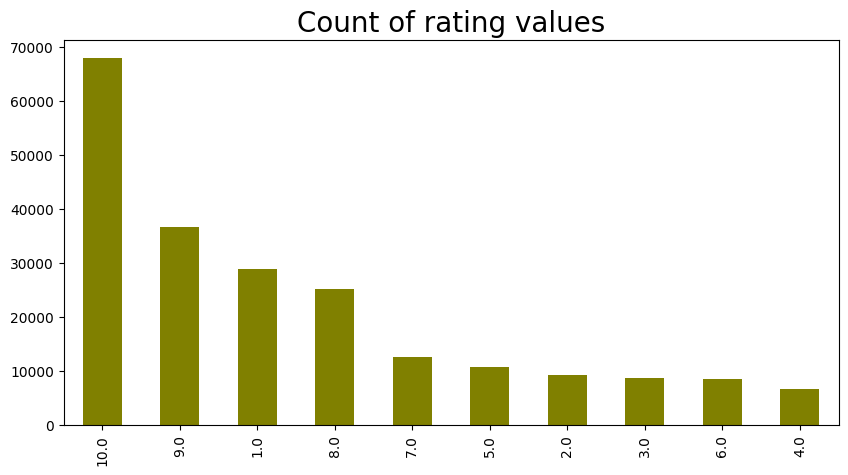

In [ ]:
rating = df['rating'].value_counts().sort_values(ascending=False)
rating.plot(kind="bar", figsize = (10,5), fontsize = 10,color="olive")
plt.xlabel("", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Count of rating values", fontsize = 20)

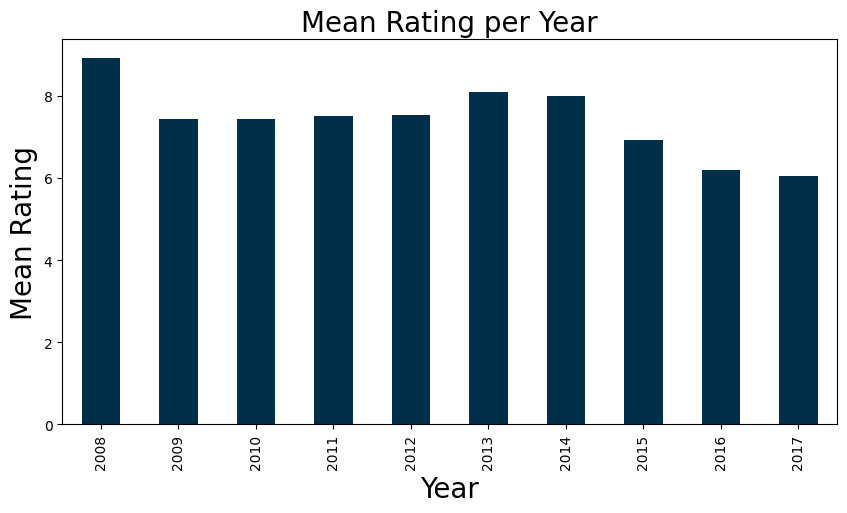

In [ ]:
df['date'] = pd.to_datetime(df['date'])

# Use .dt accessor to extract year
df['year'] = df['date'].dt.year

# Group by year and calculate mean rating
rating = df.groupby('year')['rating'].mean()

# Plotting the mean rating per year
rating.plot(kind="bar", figsize=(10,5), fontsize=10, color="#003049")
plt.xlabel("Year", fontsize=20)  # Add label for x-axis
plt.ylabel("Mean Rating", fontsize=20)  # Add label for y-axis
plt.title("Mean Rating per Year", fontsize=20)  # Add plot title

# Show the plot
plt.show()

In [ ]:
df["usefulCount"].describe()

count    215063.000000
mean         28.001004
std          36.346069
min           0.000000
25%           6.000000
50%          16.000000
75%          36.000000
max        1291.000000
Name: usefulCount, dtype: float64

In [ ]:
# Assuming df is your DataFrame containing columns 'usefulCount' and 'condition'
min = df['usefulCount'].min()
max = df['usefulCount'].max()

min_condition = df.loc[min, 'condition']
max_condition = df.loc[max, 'condition']

print(min)
print(max)

print("Condition corresponding to minimum usefulCount:", min_condition)
print("Condition corresponding to maximum usefulCount:", max_condition)

0
1291
Condition corresponding to minimum usefulCount: Left Ventricular Dysfunction
Condition corresponding to maximum usefulCount: Rhinitis


In [ ]:

condition = "Left Ventricular Dysfunction"  # Specify the condition
# Filter the DataFrame based on the condition
filtered_df = df[df['condition'] == condition]

# Extract all drugs corresponding to the condition
drugs_for_condition = filtered_df['drugName'].unique()

# Print the drugs corresponding to the condition
print("Drugs corresponding to the condition:", drugs_for_condition)

Drugs corresponding to the condition: ['Valsartan' 'Coreg' 'Metoprolol' 'Diovan' 'Carvedilol' 'Enalapril'
 'Toprol-XL' 'Benazepril' 'Vasotec']


In [ ]:
condition="Rhinitis"
# Filter the DataFrame based on the condition
filtered_df_1 = df[df['condition'] == condition]

# Extract all drugs corresponding to the condition
drugs_for_condition_1 = filtered_df['drugName'].unique()
# Print the drugs corresponding to the condition
print("Drugs corresponding to the condition:", drugs_for_condition_1)

Drugs corresponding to the condition: ['Valsartan' 'Coreg' 'Metoprolol' 'Diovan' 'Carvedilol' 'Enalapril'
 'Toprol-XL' 'Benazepril' 'Vasotec']


Text(0.5, 1.0, 'Total Missing Value ')

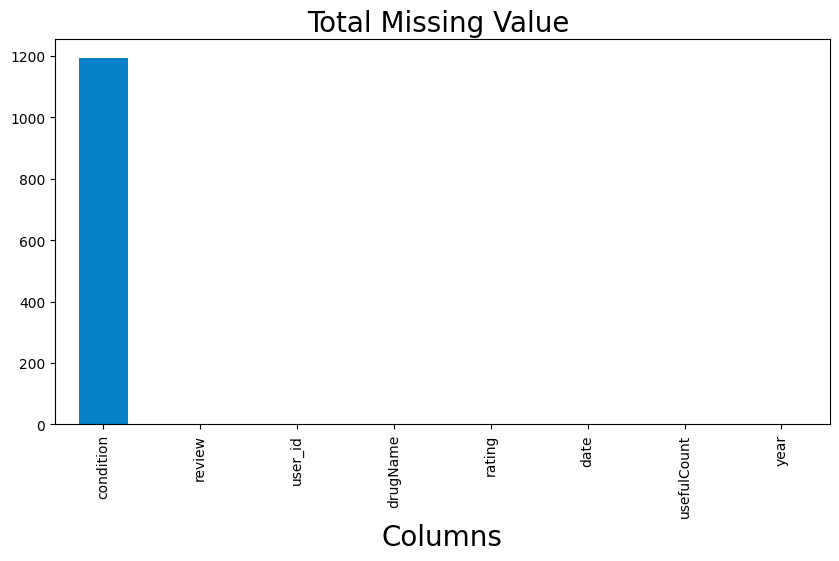

In [ ]:
percent = (df.isnull().sum()).sort_values(ascending=False)
percent.plot(kind="bar", figsize = (10,5), fontsize = 10, color='#0582ca')
plt.xlabel("Columns", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Total Missing Value ", fontsize = 20)

In [ ]:
df.head()

,user_id,drugName,condition,review,rating,date,usefulCount,year
0,206461,Valsartan,Left Ventricular Dysfunction,It effect I combination Bystolic Mg Fish Oil,9.0,2012-05-20,27,2012
1,95260,Guanfacine,ADHD,My son halfway fourth week Intuniv We concerne...,8.0,2010-04-27,192,2010
2,92703,Lybrel,Birth Control,I oral contraceptive pill cycle happy- light p...,5.0,2009-12-14,17,2009
3,138000,Ortho Evra,Birth Control,This time form birth control Im glad I went pa...,8.0,2015-11-03,10,2015
4,35696,Buprenorphine / naloxone,Opiate Dependence,Suboxone completely turned life around I feel ...,9.0,2016-11-27,37,2016


In [ ]:
df.shape

(215063, 8)

In [ ]:
df1 = df.dropna(axis=0)

In [ ]:
df1.shape

(213867, 8)

Text(0.5, 1.0, 'Total Missing Value ')

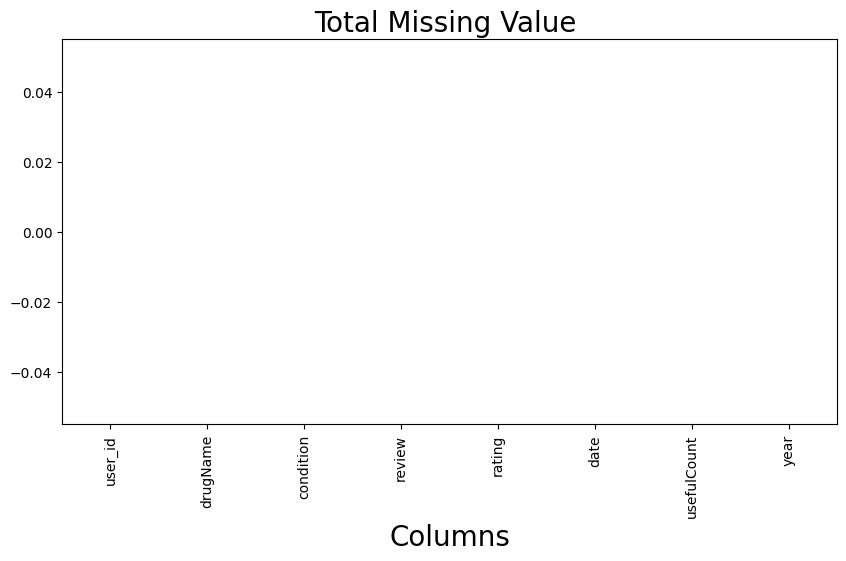

In [ ]:
percent = (df1.isnull().sum()).sort_values(ascending=False)
percent.plot(kind="bar", figsize = (10,5), fontsize = 10, color='green')
plt.xlabel("Columns", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Total Missing Value ", fontsize = 20)

### identify and collect the row indices (positions) where the substring '</span>' appears within the values of the 'condition' column in the DataFrame

In [ ]:
#df1.index refers to the index (row labels) of the DataFrame
#set(df1.index): Converts the index of df1 into a set. This will give you a unique set of all row labels (or index values) from the DataFrame
all_list = set(df1.index)
#This initializes an empty list named span_list. This list will be used to store indices (row numbers) where the string '</span>' is found within the 'condition' column of the DataFrame.
span_list = []
"""
 This is a loop that iterates over each row of the 'condition' column in the DataFrame df_all, where i is the index (row number) and j is the value
  (content of the 'condition' column) of that row.
"""
for i,j in enumerate(df1['condition']):
    if '</span>' in j:
        span_list.append(i)

### filter rows from df1 based on the absence of 'span' in the 'condition' column and resets the DataFrame index.

In [ ]:
# Calculate new_idx (as before)
new_idx = all_list.difference(set(span_list))

# Validate and filter DataFrame based on new_idx
if not new_idx:
    print("No valid indices found.")
    df_filtered = pd.DataFrame()  # Empty DataFrame
else:
    # Validate indices within the DataFrame's range
    max_index = len(df1) - 1
    valid_idx = [idx for idx in new_idx if 0 <= idx <= max_index]

    # Filter DataFrame and reset index
    df_filtered = df1.iloc[valid_idx].reset_index(drop=True)

    # Delete redundant 'index' column if needed
    if 'index' in df_filtered.columns:
        del df_filtered['index']

# Use df_filtered for further processing
print(df_filtered)


        user_id                  drugName                     condition  \
0        206461                 Valsartan  Left Ventricular Dysfunction   
1         95260                Guanfacine                          ADHD   
2         92703                    Lybrel                 Birth Control   
3        138000                Ortho Evra                 Birth Control   
4         35696  Buprenorphine / naloxone             Opiate Dependence   
...         ...                       ...                           ...   
211511   159999                 Tamoxifen     Breast Cancer, Prevention   
211512   140714              Escitalopram                       Anxiety   
211513   130945            Levonorgestrel                 Birth Control   
211514    47656                Tapentadol                          Pain   
211515   113712                 Arthrotec                      Sciatica   

                                                   review  rating       date  \
0            It eff

In [ ]:
df_filtered.shape

(211516, 8)

In [ ]:
df_condition = df_filtered.groupby(['condition'])['drugName'].nunique().sort_values(ascending=False)
df_condition = pd.DataFrame(df_condition).reset_index()
df_condition.head(20)

,condition,drugName
0,Not Listed / Othe,253
1,Pain,219
2,Birth Control,181
3,High Blood Pressure,145
4,Acne,127
5,Depression,115
6,Rheumatoid Arthritis,107
7,"Diabetes, Type 2",97
8,Allergic Rhinitis,95
9,Insomnia,85


In [ ]:
# Group by 'condition' and count the number of unique 'drugName'
df_condition = df_filtered.groupby(['condition'])['drugName'].nunique().sort_values(ascending=False)
df_condition = pd.DataFrame(df_condition).reset_index()

# Filter conditions with more than one unique drug name
conditions_to_keep = df_condition[df_condition['drugName'] > 1]['condition']

# Filter df_filtered based on conditions to keep
df_filtered_filtered = df_filtered[df_filtered['condition'].isin(conditions_to_keep)]

df_filtered_filtered

,user_id,drugName,condition,review,rating,date,usefulCount,year
0,206461,Valsartan,Left Ventricular Dysfunction,It effect I combination Bystolic Mg Fish Oil,9.0,2012-05-20,27,2012
1,95260,Guanfacine,ADHD,My son halfway fourth week Intuniv We concerne...,8.0,2010-04-27,192,2010
2,92703,Lybrel,Birth Control,I oral contraceptive pill cycle happy- light p...,5.0,2009-12-14,17,2009
3,138000,Ortho Evra,Birth Control,This time form birth control Im glad I went pa...,8.0,2015-11-03,10,2015
4,35696,Buprenorphine / naloxone,Opiate Dependence,Suboxone completely turned life around I feel ...,9.0,2016-11-27,37,2016
...,...,...,...,...,...,...,...,...
211511,159999,Tamoxifen,"Breast Cancer, Prevention",I taken Tamoxifen year Side effect severe swea...,10.0,2014-09-13,43,2014
211512,140714,Escitalopram,Anxiety,Ive taking Lexapro escitaploprgram February Fi...,9.0,2016-10-08,11,2016
211513,130945,Levonorgestrel,Birth Control,Im married year old I kid Taking pill hassle I...,8.0,2010-11-15,7,2010
211514,47656,Tapentadol,Pain,I prescribed Nucynta severe neckshoulder pain ...,1.0,2011-11-28,20,2011


In [ ]:
google_drive_path = '/content/drive/MyDrive/eda_rs.csv'
df_filtered_filtered.to_csv(google_drive_path, index=False)
print(f"DataFrame saved successfully to: {google_drive_path}")

DataFrame saved successfully to: /content/drive/MyDrive/eda_rs.csv


In [5]:

google_drive_path = '/content/drive/MyDrive/eda_rs.csv'
import pandas as pd
df_modified = pd.read_csv(google_drive_path)
print("DataFrame loaded from CSV file:")

DataFrame loaded from CSV file:


In [6]:
df_modified.shape

(210876, 8)

# Step 3:**Simple RNN Model:**

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout



In [8]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()

# converting all the reviews to list to pass it as a parameter to fit_on_texts
reviews_to_list = df_modified['review'].tolist()
tokenizer.fit_on_texts(reviews_to_list)

# Generating text sequences
text_sequences = tokenizer.texts_to_sequences(reviews_to_list)




In [9]:
max_words=500

In [10]:
data = pd.get_dummies(df_modified, columns = ['rating'])




In [11]:
X = pad_sequences(text_sequences, maxlen = max_words)

In [12]:
y=data[['rating_1.0', 'rating_2.0', 'rating_3.0', 'rating_4.0',
       'rating_5.0','rating_6.0','rating_7.0','rating_8.0','rating_9.0','rating_10.0']]

In [23]:

from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)


In [27]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight


y_integers = np.argmax(y_train, axis=1)
classes = np.unique(y_integers)
weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_integers)
class_weights = dict(zip(classes, weights))


In [29]:
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.utils.class_weight import compute_class_weight




# Creating a new RNN model
rnn_fixed = Sequential(name="Fixed_RNN")
rnn_fixed.add(Embedding(len(tokenizer.word_index) + 1, max_words, input_length=max_words))
rnn_fixed.add(SimpleRNN(128, activation='relu', return_sequences=True))
rnn_fixed.add(SimpleRNN(64, activation='relu', return_sequences=False))
rnn_fixed.add(Dense(10, activation='softmax'))

# Compiling the model with weighted categorical crossentropy loss
rnn_fixed.compile(loss="categorical_crossentropy",
                  optimizer=Adam(),
                  metrics=['accuracy'])

# Training the model with class weights
history = rnn_fixed.fit(X_train, y_train,
                         class_weight=class_weights,
                        batch_size=64,
                        epochs=2,
                        verbose=1,
                        validation_data=(X_test, y_test))

# Printing model score on test data
print("Fixed RNN Score---> ", rnn_fixed.evaluate(X_test, y_test, verbose=1))


Epoch 1/2
2636/2636 [==============================] - 5554s 2s/step - loss: 2.0754 - accuracy: 0.2892 - val_loss: 1.8691 - val_accuracy: 0.2982
Epoch 2/2
1318/1318 [==============================] - 210s 159ms/step - loss: 1.7668 - accuracy: 0.3421
Fixed RNN Score--->  [1.7668401002883911, 0.3421376943588257]


In [30]:
from tensorflow.keras.models import save_model

model_save_path = '/content/drive/MyDrive/new_rnn_model.h5'


rnn_fixed.save(model_save_path)

print(f"Model saved to {model_save_path}")


Model saved to /content/drive/MyDrive/new_rnn_model.h5


In [31]:
from tensorflow.keras.models import load_model




downloaded_model_path = '/content/drive/MyDrive/new_rnn_model.h5'

rnn = load_model(downloaded_model_path)




In [32]:
import pandas as pd
matrix_df = df_modified.pivot_table(index='condition', columns='drugName', values='rating', aggfunc='mean')
matrix_df.dropna(axis=1, how='all', inplace=True)
matrix_df.dropna(axis=0, how='all', inplace=True)
print(matrix_df)

drugName                   A + D Cracked Skin Relief  A / B Otic  \
condition                                                          
ADHD                                             NaN         NaN   
AIDS Related Wasting                             NaN         NaN   
Abdominal Distension                             NaN         NaN   
Abnormal Uterine Bleeding                        NaN         NaN   
Abortion                                         NaN         NaN   
...                                              ...         ...   
min)                                             NaN         NaN   
moterol)                                         NaN         NaN   
t Care                                           NaN         NaN   
von Willebrand's Disease                         NaN         NaN   
zen Shoulde                                      NaN         NaN   

drugName                   Abacavir / dolutegravir / lamivudine  \
condition                                       

In [17]:
import pandas as pd

matrix_df.to_csv('/content/drive/MyDrive/matrix_data.csv')



# **Step 4:Recommendation**

In [88]:
def predict_review_rating(text):
    text_sequences_test = tokenizer.texts_to_sequences([text])
    testing = pad_sequences(text_sequences_test, maxlen=max_words)
    predictions = rnn.predict(testing)
    epsilon = np.random.rand()
    if( epsilon > 0.5 ):
      y_pred_test = np.argmax(predictions, axis=1) +1  # Assuming classes are from 1 to 10
      return y_pred_test[0]
    else:
      sorted_indices = np.argsort(predictions)
      y_pred_test = sorted_indices[0][8] + 1
      return y_pred_test

reviews = 'worst medicine'



rating = predict_review_rating(reviews)
print(f"The rating for '{reviews}' is: {rating}")

1/1 [==============================] - 0s 122ms/step
The rating for 'worst medicine' is: 2


In [20]:
matrix_df = pd.read_csv("/content/drive/MyDrive/matrix_data.csv", index_col=0)

In [60]:
matrix_df

drugName,A + D Cracked Skin Relief,A / B Otic,Abacavir / dolutegravir / lamivudine,Abacavir / lamivudine,Abacavir / lamivudine / zidovudine,Abatacept,Abilify,Abilify Discmelt,Abilify Maintena,Abiraterone,...,Zyrtec,Zyrtec-D,Zyrtec-D 12 Hour,Zytiga,Zyvox,ZzzQuil,depo-subQ provera 104,ella,femhrt,pHisoHex
condition,,,,,,,,,,,,,,,,,,,,,
ADHD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AIDS Related Wasting,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Abdominal Distension,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Abnormal Uterine Bleeding,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Abortion,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
min),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
moterol),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
t Care,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
medicine ="Desoxyn"
condition = "ADHD"
matrix_df.loc[condition,medicine] += (rating-5) / matrix_df.loc[condition].count()

print("Top 5 medicines for", condition, "are:")
sorted_row = matrix_df.loc[condition].sort_values(ascending=False)
top_medicines = sorted_row.head(5)
print(top_medicines)



Top 5 medicines for ADHD are:
drugName
Dextrostat    10.000000
ProCentra     10.000000
Selegiline    10.000000
Desoxyn        9.528131
Pemoline       9.362069
Name: ADHD, dtype: float64
